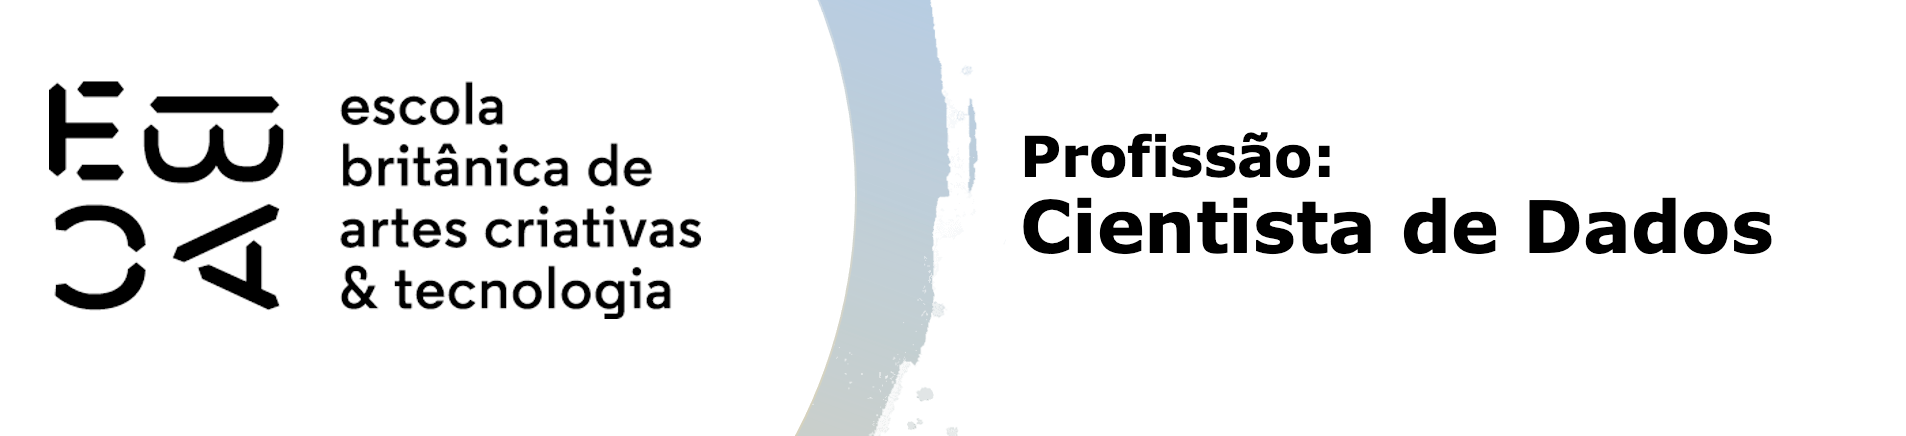

# Regressão III - Tarefa

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,750000.0,8319.025636,4810.382817,0.000000,4147.000000,8324.000000,12490.000000,1.664900e+04
qtd_filhos,750000.0,0.433267,0.738516,0.000000,0.000000,0.000000,1.000000,1.400000e+01
idade,750000.0,43.796907,11.229454,22.000000,34.000000,43.000000,53.000000,6.800000e+01
tempo_emprego,624240.0,7.746165,6.684181,0.117808,3.049315,6.046575,10.180822,4.290685e+01
qt_pessoas_residencia,750000.0,2.212315,0.903041,1.000000,2.000000,2.000000,3.000000,1.500000e+01
renda,750000.0,23977.420954,90399.725246,95.300000,3469.370000,7929.980000,18647.160000,6.802261e+06


Comparação com a Média: Quando o desvio padrão é próximo da média, isso indica que os valores estão amplamente distribuídos ao redor da média, e não concentrados próximos a ela.
Ao usarmos a média para imputar os valores faltantes, poderiamos estar ignorando essa variabilidade significativa, levando a uma imputação que não representa bem a distribuição original dos dados. Desta forma, imputaremos os dados faltantes com a mediana

## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [79]:
# Verificando a presença de valores missing no DataFrame
missing_values = df.isnull().sum()

# Exibindo a quantidade de valores missing em cada coluna
print("Quantidade de valores missing por coluna:")
print(missing_values)

Quantidade de valores missing por coluna:
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64


In [80]:
# Calculando a mediana da coluna 'tempo_emprego'
mediana_tempo_emprego = df['tempo_emprego'].median()

# Exibindo a mediana calculada
print(f"Mediana de 'tempo_emprego': {mediana_tempo_emprego}")

# Imputando os valores faltantes com a mediana
df['tempo_emprego'].fillna(mediana_tempo_emprego, inplace=True)

# Verificando se ainda há valores faltantes após a imputação
missing_values_after = df['tempo_emprego'].isnull().sum()
print(f"Quantidade de valores missing em 'tempo_emprego' após a imputação: {missing_values_after}")


Mediana de 'tempo_emprego': 6.046575342465753
Quantidade de valores missing em 'tempo_emprego' após a imputação: 0


C:\Users\giova\AppData\Local\Temp\ipykernel_11928\1204488842.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(mediana_tempo_emprego, inplace=True)


In [81]:
df.duplicated().sum()

562758

In [82]:
# Excluir duplicados
df = df.drop_duplicates()

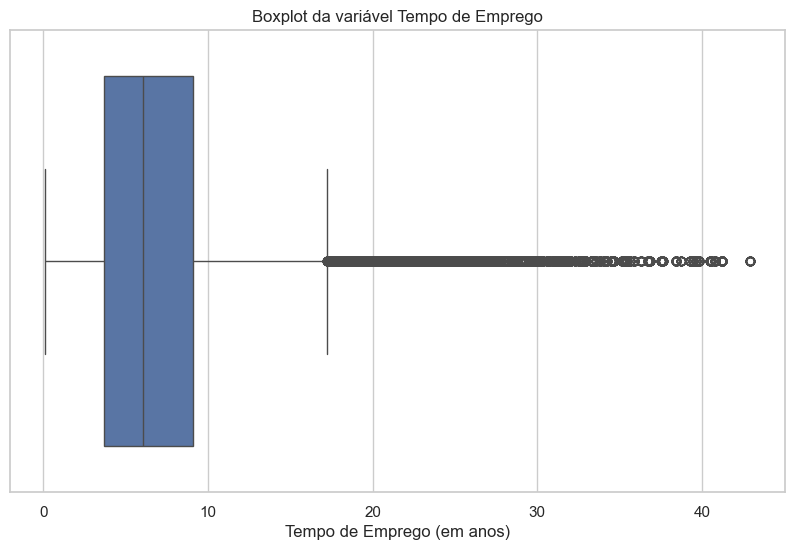

In [83]:
# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tempo_emprego'])

# Adicionando título e rótulos
plt.title('Boxplot da variável Tempo de Emprego')
plt.xlabel('Tempo de Emprego (em anos)')

# Exibindo o gráfico
plt.show()

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,187242.0,8326.739674,4809.099947,0.000000,4140.250000,8328.000000,12498.00000,1.664900e+04
qtd_filhos,187242.0,0.426341,0.740546,0.000000,0.000000,0.000000,1.00000,1.400000e+01
idade,187242.0,44.116395,11.185447,22.000000,35.000000,43.000000,53.00000,6.800000e+01
tempo_emprego,187242.0,7.485022,6.128880,0.117808,3.682192,6.046575,9.10137,4.290685e+01
qt_pessoas_residencia,187242.0,2.205242,0.902670,1.000000,2.000000,2.000000,3.00000,1.500000e+01
renda,187242.0,21982.556014,85300.779028,95.300000,2994.050000,6971.580000,16934.66500,6.802261e+06


**Obsrvamos que após a imputação dos dados faltantes com a mediana, observamos que tanto a media quanto o desvio padrão ficaram muito proximos à distribuição dos dados originais, desta forma, mantivemos as informações sem distorcer a distribuição original**

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

**Obs: Conforme observamos na distribuição das nossas coluns, não possuímos uma coluna temporal. Desta forma, essa parte do exercício seria possível apenas com base em uma simulação e não dados que façam real sentido ao problema em questão.**


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecionando as variáveis preditoras (excluindo 'index' e 'data_ficticia', se existir)
X = df.drop(columns=['index', 'renda', 'data_ficticia'], errors='ignore')
y = df['renda']

# Codificando variáveis categóricas (se necessário)
X = pd.get_dummies(X, drop_first=True)

# Separando os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2. Treinamento do Modelo

# Instanciando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#### 3. Avaliação do Modelo com R² Ajustado

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando o R² Ajustado
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Número de observações
p = X_test.shape[1]  # Número de variáveis preditoras

# Fórmula do R² Ajustado
r2_ajustado = 1 - (1-r2) * ((n-1)/(n-p-1))

print(f"R² Ajustado: {r2_ajustado:.4f}")


R² Ajustado: 0.2009


**O R² Ajustado obtido foi de 0.2009, o que significa que aproximadamente 20.09% da variabilidade na variável de interesse (renda) é explicada pelo modelo de regressão linear com as variáveis preditoras selecionadas. Esse valor indica que o modelo tem um poder preditivo moderado, mas ainda há uma grande parte da variabilidade dos dados que não é explicada pelo modelo, sugerindo que ele pode ser melhorado com a inclusão de outras variáveis, transformações ou modelos mais complexos.**

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [86]:
# Adicionar uma pequena variação para diferenciar valores iguais
df['tempo_emprego_variado'] = df['tempo_emprego'] + np.random.normal(0, 1e-9, df.shape[0])

# Categorizar a variável tempo_emprego em 20 quantis
df['tempo_emprego_quantis'] = pd.qcut(df['tempo_emprego_variado'], q=20, labels=False, duplicates='drop')

# Criar a tabela de perfil
perfil_df = df.groupby('tempo_emprego_quantis').agg(
    quantidade_observacoes=('tempo_emprego', 'size'),
    media_log_renda=('renda', lambda x: np.log(x).mean()),
    media_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()

# Exibir a tabela de perfil
print(perfil_df)



    tempo_emprego_quantis  quantidade_observacoes  media_log_renda  \
0                       0                    9363         8.024472   
1                       1                    9362         8.102657   
2                       2                    9362         8.209129   
3                       3                    9362         8.289375   
4                       4                    9362         8.393736   
5                       5                    9362         8.504815   
6                       6                    9362         8.542837   
7                       7                    9362         8.719332   
8                       8                    9362         8.691668   
9                       9                    9362         8.653817   
10                     10                    9362         8.649536   
11                     11                    9362         8.692403   
12                     12                    9362         8.828965   
13                  

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187242 entries, 2015-01-01 to 2016-03-01
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  187242 non-null  int64  
 1   sexo                   187242 non-null  object 
 2   posse_de_veiculo       187242 non-null  object 
 3   posse_de_imovel        187242 non-null  object 
 4   qtd_filhos             187242 non-null  int64  
 5   tipo_renda             187242 non-null  object 
 6   educacao               187242 non-null  object 
 7   estado_civil           187242 non-null  object 
 8   tipo_residencia        187242 non-null  object 
 9   idade                  187242 non-null  int64  
 10  tempo_emprego          187242 non-null  float64
 11  qt_pessoas_residencia  187242 non-null  float64
 12  renda                  187242 non-null  float64
 13  tempo_emprego_variado  187242 non-null  float64
 14  tempo_emprego_quantis  18724

O código acima categoriza a variável tempo_emprego em 20 quantis, adicionando uma pequena variação para evitar valores duplicados. Em seguida, cria uma tabela que mostra o número de observações, a média do log-renda e a média do tempo de emprego para cada quantil. Por fim, a tabela é exibida, resumindo as características principais para cada categoria de tempo_emprego.

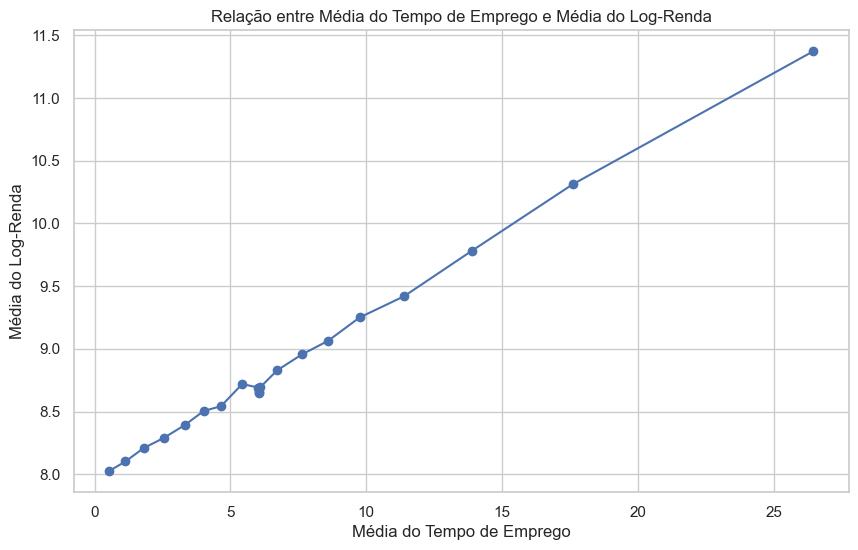

In [88]:
# Gráfico da média do tempo de emprego pela média do log-renda
plt.figure(figsize=(10, 6))
plt.plot(perfil_df['media_tempo_emprego'], perfil_df['media_log_renda'], marker='o', linestyle='-')
plt.title('Relação entre Média do Tempo de Emprego e Média do Log-Renda')
plt.xlabel('Média do Tempo de Emprego')
plt.ylabel('Média do Log-Renda')
plt.grid(True)
plt.show()


### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Separando os dados em treino e teste novamente para as transformações
X = df.drop(columns=['index', 'renda', 'data_ficticia', 'tempo_emprego_quantis'], errors='ignore')
y = df['renda']

# Codificando variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression function
def linear_regression_r2_adj(X_train, X_test, y_train, y_test):
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    r2_ajustado = 1 - (1-r2) * ((n-1)/(n-p-1))
    return r2_ajustado

### Transformação 1: Logaritmo na Variável tempo_emprego

# Adicionando o logaritmo de tempo_emprego
X_train_log = X_train.copy()
X_test_log = X_test.copy()
X_train_log['log_tempo_emprego'] = np.log1p(X_train_log['tempo_emprego'])  # np.log1p para lidar com valores zero
X_test_log['log_tempo_emprego'] = np.log1p(X_test_log['tempo_emprego'])

# Avaliando o modelo com o logaritmo
r2_ajustado_log = linear_regression_r2_adj(X_train_log.drop(columns=['tempo_emprego']), X_test_log.drop(columns=['tempo_emprego']), y_train, y_test)
print(f"R² Ajustado com Logaritmo de tempo_emprego: {r2_ajustado_log:.4f}")

### Transformação 2: Polinômio de Segundo Grau em tempo_emprego

# Adicionando termo quadrático de tempo_emprego
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()
X_train_poly[['tempo_emprego', 'tempo_emprego_squared']] = poly.fit_transform(X_train[['tempo_emprego']])
X_test_poly[['tempo_emprego', 'tempo_emprego_squared']] = poly.transform(X_test[['tempo_emprego']])

# Avaliando o modelo com polinômio
r2_ajustado_poly = linear_regression_r2_adj(X_train_poly, X_test_poly, y_train, y_test)
print(f"R² Ajustado com Polinômio de Segundo Grau de tempo_emprego: {r2_ajustado_poly:.4f}")


R² Ajustado com Logaritmo de tempo_emprego: 0.2522
R² Ajustado com Polinômio de Segundo Grau de tempo_emprego: 0.3035


### Resumo dos Resultados

Após aplicar diferentes técnicas de transformação na variável `tempo_emprego`, os modelos foram avaliados com base no R² Ajustado na base de testes. Abaixo estão os resultados obtidos:

- **R² Ajustado com Logaritmo de tempo_emprego**: 0.2522
  - Aplicar o logaritmo à variável `tempo_emprego` melhorou o ajuste do modelo, capturando uma relação mais complexa entre `tempo_emprego` e `renda`. Essa transformação foi útil para suavizar a variação em valores mais altos de `tempo_emprego`.

- **R² Ajustado com Polinômio de Segundo Grau de tempo_emprego**: 0.3035
  - A inclusão de um termo polinomial de segundo grau para `tempo_emprego` proporcionou o melhor desempenho entre as transformações testadas. Este resultado indica que a relação entre `tempo_emprego` e `renda` é melhor representada por uma forma não linear, capturada eficazmente pela transformação polinomial.

### Conclusão

A transformação polinomial de segundo grau foi a mais eficaz, resultando no maior R² Ajustado (0.3035) na base de testes. Isso sugere que o modelo com essa transformação é mais adequado para capturar a relação entre `tempo_emprego` e `renda` em novos dados. Se o objetivo é maximizar a capacidade preditiva, este modelo seria o preferido para aplicação prática.
